<a href="https://colab.research.google.com/github/ReynaldoAVZ/Scientific-Machine-Learning-7750/blob/main/HW2/HW2_ReducedOrderModeling_SVD_DMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
## In this problem, you should do each part by hand, but may use Matlab/Python to verify your work.
## Consider the matrix:
## A =
## [0 1 0]
## [1 0 0]

### (a) Find by hand the (full, non-reduced) singular value decomposition of A.


In [3]:
# declare libraries
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# declare given A matrix
A = np.array([[0, 1, 0], [1, 0, 0]])

# verify singular value decomposition
U, S, V = la.svd(A)

# print result
print("Problem 1a: \n")
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)




Problem 1a: 

U = 
 [[1. 0.]
 [0. 1.]]
S = 
 [1. 1.]
V = 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### (b) Find the pseudoinverse of A


In [4]:
# find pseudoinverse of A
pseudoinverse_A = la.pinv(A)

# print result
print("Problem 1b: \n")
print("A Pseudoinverse = \n", pseudoinverse_A)

Problem 1b: 

A Pseudoinverse = 
 [[0. 1.]
 [1. 0.]
 [0. 0.]]


### (c) Find the rank-1 matrix A_1 that minimizes ||A - A_r||_F, where the subscript F denotes the Frobenius norm of a matrix.




# Problem 2
## Consider the data generated by the file hw2Q2.m (in Matlab) or hw2Q2.ipynb (Python note-book) which is assembled into the data matrix X. Note that the data is complex numbers (e.g., 1j in Python is i = sqrt(-1) ) and the SVD commands will handle that. If you study the short code that generates X you will see that this is spatiotemporal data as we discussed. Columns are time-steps and rows are the data in space (here called y). Note that the actual values of y (spatial position/coordinate) and t (time) do not appear in X but we can tell what they are based on the in dex of our data point in X and how we defined y and t in the code.

## Use Python or Matlab (you may use the sample codes provided in class or textbook and modify them) to:

In [5]:
# given code from "hw2Q2.ipynb"
import numpy as np
from numpy import linalg
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt])

### (a) Compute the PCA of X, and plot all the singular values sorted from largest to smallest. Why are the first tweo singular values much larger than the rest (which are essentially zero)? Think about how the data is generated (the code that generates X) and the concept of rank (uncorrelated data).

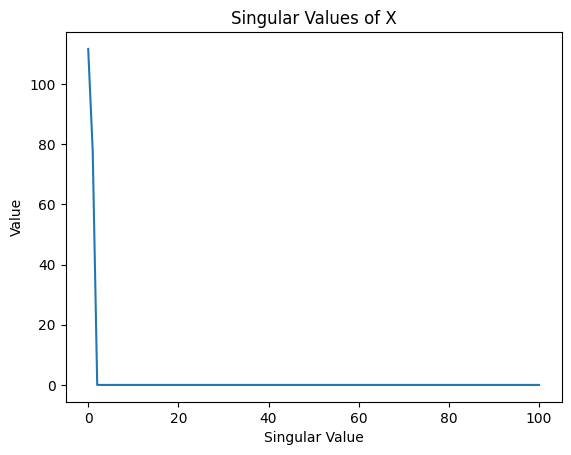

Problem 2a: 

The first 10 largest singular values of X are: 
 [1.11692688e+02 7.77776698e+01 3.41417291e-14 2.42965954e-14
 1.09397818e-14 1.09397818e-14 1.09397818e-14 1.09397818e-14
 1.09397818e-14 1.09397818e-14]


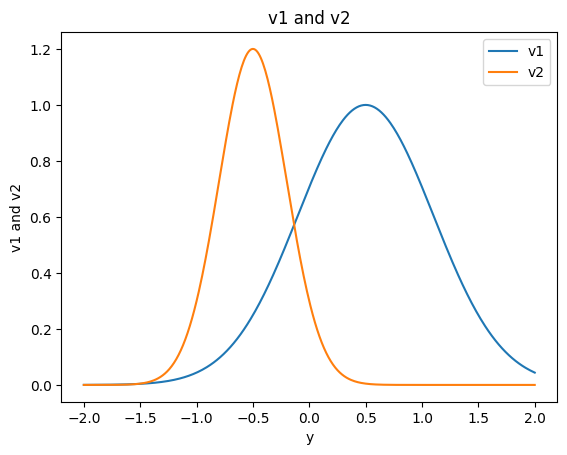

In [6]:
# compute PCA of X
U, S, V = linalg.svd(X, full_matrices=False)

# sort singular values from largest to smallest
S = np.sort(S)[::-1]

# plot singular values
plt.plot(S)
plt.xlabel('Singular Value')
plt.ylabel('Value')
plt.title('Singular Values of X')
plt.show()

# print the first 10 largest singular values
print("Problem 2a: \n")
print("The first 10 largest singular values of X are: \n", S[:10])

# plot v1 and v2
plt.plot(y, v1, label='v1')
plt.plot(y, v2, label='v2')
plt.xlabel('y')
plt.ylabel('v1 and v2')
plt.title('v1 and v2')
plt.legend()
plt.show()

### Plot the “real” part of the first two left singular vectors against y (the spatial coordinate). **Bonus grade**: Do the same plot for the two leading right singular vectors. Note that this time the plot is against time (t). **Important reminder**: U has information about spatial modes, V has information in time (coefficients).

### (c) Compute the dynamic mode decomposition of X. (That is, find a matrix A that maps each column of X one step forward in time, and compute the eigendecomposition of this matrix A). Plot the real part of eigenvectors of A that correspond to nonzero eigenvalues (against space y).


### (d) Change the analytical equation in the code that generated your data such that it is a very different function (don’t just change parameters; define a very different spatiotemporaldata). Repeat either the PCA or DMD above with this new data. Bonus grade: Define your function such that your new results have some interesting conceptual differences with the original results and discuss these differences.
